In [ ]:
# 2. 구직사이트(잡코리아, 사람인)를 크롤링하여 관심직군의 키워드를 워드클라우드로 표현

In [1]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk import WhitespaceTokenizer
from collections import Counter

In [2]:
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
import time

In [3]:
browser = Chrome() #브라우저 실행

In [5]:
my_list = []

for pg in np.arange(1,100):
    browser.get("https://www.jobkorea.co.kr/Search/?stext=%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&tabType=recruit&Page_No="f"{pg}")
    menus = browser.find_elements(By.CSS_SELECTOR, 'li.list-post .etc')
    for c in menus:
        my_list.append(c.text.replace("\n", "").replace(",","").strip())
my_list

['데이터분석 데이터분석 GUI 빅데이터 OLAP개발자 데이터관리 암호화폐 웹표준·웹접근성 증강현실 펌웨어 데이터레이크 사물인터넷 인터페이스 검증 GUI 백엔드 음성인식 SI개발 테스터 프론트엔드 DBMS 시스템설계 웹마스터 회로설계 딥러닝 데이터시각화 암호화폐 ETL 시스템분석 시스템운영 제안·컨설팅 데이터마이닝 서버관리 인공지능 챗봇 시스템운영 정보보안 BI SI개발 방화벽 서버구축 시스템분석 반응형웹 앱기획 이미지프로세싱 클라이언트 SI개발 UI·UX기획 네트워크관리 웹마스터 자연어처리(NLP) 클라이언트 콘텐츠기획 DID SI개발 메타버스 모델링 보안관제 시스템분석 시스템설계 증강현실 인터페이스 솔루션스아키텍트 게임기획 네트워크관리 스토리보드 펌웨어 MMORPG 분석모델링 네트워크관리 모델링 정보보안 IT학원 클라우드개발자 가상현실 아키텍처 챗봇 클라이언트 서버구축 시스템설계 반응형웹 핀테크 DW모델러 HTTP 서비스기획 서버관리 암호화폐 음성인식 클라우드아키텍트 핀테크 Dapp 검증 네트워크관리 가상현실 핀테크 데이터파이프라인 모델링 DB튜닝 스마트컨트랙트 메타버스',
 '데이터분석 데이터시각화 음식료 분석모델링',
 '데이터분석 결산 인테리어디자인 품질보증 생산관리 검증 자금관리 PI 마케팅 R&D VMD 사업관리 영업관리 노사관리 대외협력',
 '데이터분석 전략컨설팅 빅데이터 전략기획',
 '데이터분석 SM 솔루션 Python SI 분석모델링 소프트웨어개발 데이터엔지니어',
 '데이터분석 데이터분석',
 '데이터분석 빅데이터 게임기획 게임개발 서비스 개선',
 '데이터분석 빅데이터 모바일앱게임 데이터레이크 딥러닝 게임기획 게임운영관리 웹게임 분석모델링 게임개발 모델링',
 '데이터분석 별정통신 자료조사 텔레콤 문서작성 통신 인터넷전화 품질테스트 전산입력 홈네트워크',
 '데이터분석 데이터분석 데이터관리 통계 분석가 데이터기획 데이터애널리스트 빅데이터 데이터컨설턴트 예측',
 'BigData 솔루션 딥러닝 인공지능 DataMining 소프트웨어개발'

In [6]:
len(my_list)

1951

In [7]:
import pickle

In [8]:
with open('data-files/data.pickle', 'wb') as f: #저장
    pickle.dump(my_list, f)

In [11]:
my_list
result_string = ', '.join(my_list)
print(result_string.replace(",", ""))

데이터분석 데이터분석 GUI 빅데이터 OLAP개발자 데이터관리 암호화폐 웹표준·웹접근성 증강현실 펌웨어 데이터레이크 사물인터넷 인터페이스 검증 GUI 백엔드 음성인식 SI개발 테스터 프론트엔드 DBMS 시스템설계 웹마스터 회로설계 딥러닝 데이터시각화 암호화폐 ETL 시스템분석 시스템운영 제안·컨설팅 데이터마이닝 서버관리 인공지능 챗봇 시스템운영 정보보안 BI SI개발 방화벽 서버구축 시스템분석 반응형웹 앱기획 이미지프로세싱 클라이언트 SI개발 UI·UX기획 네트워크관리 웹마스터 자연어처리(NLP) 클라이언트 콘텐츠기획 DID SI개발 메타버스 모델링 보안관제 시스템분석 시스템설계 증강현실 인터페이스 솔루션스아키텍트 게임기획 네트워크관리 스토리보드 펌웨어 MMORPG 분석모델링 네트워크관리 모델링 정보보안 IT학원 클라우드개발자 가상현실 아키텍처 챗봇 클라이언트 서버구축 시스템설계 반응형웹 핀테크 DW모델러 HTTP 서비스기획 서버관리 암호화폐 음성인식 클라우드아키텍트 핀테크 Dapp 검증 네트워크관리 가상현실 핀테크 데이터파이프라인 모델링 DB튜닝 스마트컨트랙트 메타버스 데이터분석 데이터시각화 음식료 분석모델링 데이터분석 결산 인테리어디자인 품질보증 생산관리 검증 자금관리 PI 마케팅 R&D VMD 사업관리 영업관리 노사관리 대외협력 데이터분석 전략컨설팅 빅데이터 전략기획 데이터분석 SM 솔루션 Python SI 분석모델링 소프트웨어개발 데이터엔지니어 데이터분석 데이터분석 데이터분석 빅데이터 게임기획 게임개발 서비스 개선 데이터분석 빅데이터 모바일앱게임 데이터레이크 딥러닝 게임기획 게임운영관리 웹게임 분석모델링 게임개발 모델링 데이터분석 별정통신 자료조사 텔레콤 문서작성 통신 인터넷전화 품질테스트 전산입력 홈네트워크 데이터분석 데이터분석 데이터관리 통계 분석가 데이터기획 데이터애널리스트 빅데이터 데이터컨설턴트 예측 BigData 솔루션 딥러닝 인공지능 DataMining 소프트웨어개발 광고기획 광고대행 BigData 솔루션 딥러닝 인공지능 DataMining 

------------------------------------------

------------------------------------------

In [12]:
# 데이터분석 워드클라우드
tokenizer = WhitespaceTokenizer()
result_string_tokens = tokenizer.tokenize(result_string)

In [36]:
result_counter = Counter(result_string_tokens)
most_common_tokens = dict(result_counter.most_common(1000))
wordcloud = WordCloud(width=2000, height=1500, font_path= "C:\\Users\\geon0\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf").generate_from_frequencies(most_common_tokens) #단어 빈도수 dict로 wordcloud 만들기

In [37]:
wordcloud.words_

{'데이터분석': 1.0,
 '매출관리': 0.44629822732012514,
 '전략기획': 0.42752867570385816,
 '영업기획': 0.34932221063607927,
 '콘텐츠기획': 0.3409801876955162,
 '시장분석': 0.32742440041710114,
 '거래처관리': 0.3180396246089677,
 'SNS마케팅': 0.3044838373305527,
 '개발': 0.2930135557872784,
 '고객관리': 0.278415015641293,
 '브랜드기획': 0.26903023983315955,
 '시스템설계': 0.2669447340980188,
 '시장조사': 0.26173096976016685,
 '시스템분석': 0.26068821689259647,
 '영업전략': 0.26068821689259647,
 '프로모션': 0.2502606882168926,
 '사업기획': 0.23253388946819603,
 '상품기획': 0.23044838373305526,
 '네트워크관리': 0.21793534932221065,
 '키워드광고': 0.20020855057351408,
 '설계': 0.19395203336809178,
 '시스템운영': 0.1897810218978102,
 '문서작성': 0.18769551616266944,
 '광고기획': 0.18665276329509906,
 '재고관리': 0.1845672575599583,
 'SI개발': 0.1835245046923879,
 '디자인': 0.18248175182481752,
 '거래선개발관리': 0.17205422314911367,
 '문서관리': 0.1710114702815433,
 'UI·UX기획': 0.16266944734098018,
 '브랜딩': 0.1616266944734098,
 '기업홍보': 0.15745568300312826,
 '정보보안': 0.1543274244004171,
 '가맹점관리': 0.1532846715328467

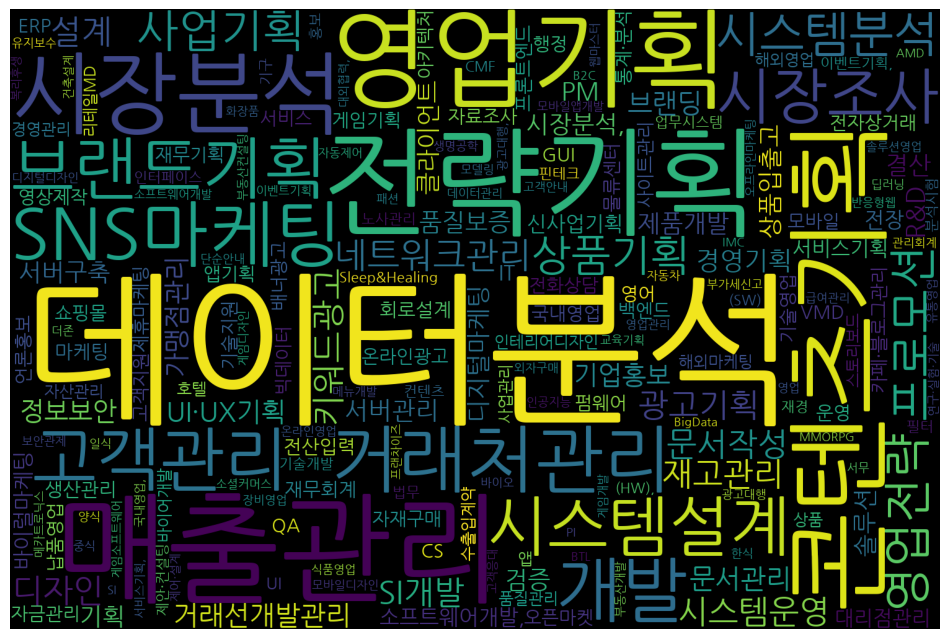

In [38]:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

------------------------------------

In [ ]:
tokenizer = WhitespaceTokenizer()
constitution_kr_tokens = tokenizer.tokenize(constitution_kr)

In [40]:
# stopword 처리
for w in ['①', '②', '.', ',', '<', '>', '/', '수', '또는', '의하여', '한다', '하다', '그', '있다', '때에는', '바에', '관한']:
    constitution_kr_tokens = list(map(lambda word: word.replace(w, ""), constitution_kr_tokens))

In [ ]:
constitution_kr_tokens[100:150]

In [41]:
constitution_kr_tokens = list(filter(lambda word:len(word) > 0, constitution_kr_tokens))

In [21]:
len(result_string_tokens)

31215

In [24]:
counter = Counter(constitution_kr_tokens)

In [25]:
counter.most_common(100)
most_common_tokens = dict(counter.most_common(1000))

In [26]:
wordcloud = WordCloud(font_path= "C:\\Users\\geon0\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf").generate_from_frequencies(most_common_tokens) #단어 빈도수 dict로 wordcloud 만들기

In [27]:
wordcloud.words_

{'데이터분석': 1.0,
 '매출관리': 0.44629822732012514,
 '전략기획': 0.42752867570385816,
 '영업기획': 0.34932221063607927,
 '콘텐츠기획': 0.3409801876955162,
 '시장분석': 0.32742440041710114,
 '거래처관리': 0.3180396246089677,
 'SNS마케팅': 0.3044838373305527,
 '개발': 0.2930135557872784,
 '고객관리': 0.278415015641293,
 '브랜드기획': 0.26903023983315955,
 '시스템설계': 0.2669447340980188,
 '시장조사': 0.26173096976016685,
 '시스템분석': 0.26068821689259647,
 '영업전략': 0.26068821689259647,
 '프로모션': 0.2502606882168926,
 '사업기획': 0.23253388946819603,
 '상품기획': 0.23044838373305526,
 '네트워크관리': 0.21793534932221065,
 '키워드광고': 0.20020855057351408,
 '설계': 0.19395203336809178,
 '시스템운영': 0.1897810218978102,
 '문서작성': 0.18769551616266944,
 '광고기획': 0.18665276329509906,
 '재고관리': 0.1845672575599583,
 'SI개발': 0.1835245046923879,
 '디자인': 0.18248175182481752,
 '거래선개발관리': 0.17205422314911367,
 '문서관리': 0.1710114702815433,
 'UI·UX기획': 0.16266944734098018,
 '브랜딩': 0.1616266944734098,
 '기업홍보': 0.15745568300312826,
 '정보보안': 0.1543274244004171,
 '가맹점관리': 0.1532846715328467

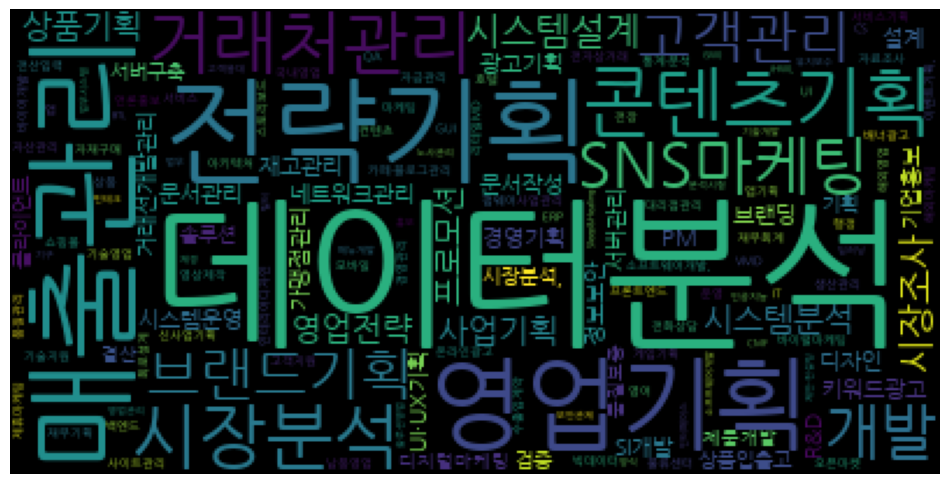

In [28]:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()